In [1]:
import sys
import os
import urllib
import json 
import base64
import re
import datetime as dt

import numpy as np
import pandas as pd
from pandas.io.json import json_normalize  
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import matplotlib as mlp 

plt.style.use('ggplot') 
plt.rcParams["image.cmap"] = "Set3"

sys.path.append('../../lib/')
from router import getPath

In [2]:
_notebookFolder = 'nb-api-001_player-report.consumer-01'

In [3]:
dirMaster = getPath('master')
dirNbOut = getPath('notebook-output')

# Load Data

In [4]:
productFullPath = os.path.join( 
    dirMaster,
    'nb-api-001_player-report',
    'nb-api-001_player-report__prod-sueco.csv',
)


dfSource = pd.read_csv( productFullPath ) 

dfSource.head(10)

,black.@id,black.rating,black.result,black.username,id,month,time_class,time_control,white.@id,white.rating,white.result,white.username,win_color,win_user,year,time_class_int,winner_sueco
0,https://api.chess.com/pub/player/marcuspeck,1698,win,marcuspeck,1609591406,1,bullet,120+1,https://api.chess.com/pub/player/elsueco1,1564,timeout,elsueco1,black,marcuspeck,2021,6,-1
1,https://api.chess.com/pub/player/ricgarancho,1538,resigned,ricgarancho,1609591776,1,bullet,120+1,https://api.chess.com/pub/player/elsueco1,1572,win,elsueco1,white,elsueco1,2021,6,1
2,https://api.chess.com/pub/player/timisbestdotcom,1518,checkmated,timisbestdotcom,1609592076,1,bullet,120+1,https://api.chess.com/pub/player/elsueco1,1579,win,elsueco1,white,elsueco1,2021,6,1
3,https://api.chess.com/pub/player/elsueco1,1589,win,elsueco1,1609592402,1,bullet,120+1,https://api.chess.com/pub/player/inquirer108,1660,timeout,Inquirer108,black,elsueco1,2021,6,1
4,https://api.chess.com/pub/player/elsueco1,1582,resigned,elsueco1,1609592664,1,bullet,120+1,https://api.chess.com/pub/player/brayokim,1643,win,brayokim,white,brayokim,2021,6,-1
5,https://api.chess.com/pub/player/tonytempske,1611,checkmated,Tonytempske,1609592916,1,bullet,120+1,https://api.chess.com/pub/player/elsueco1,1591,win,elsueco1,white,elsueco1,2021,6,1
6,https://api.chess.com/pub/player/elsueco1,1582,timeout,elsueco1,1609593229,1,bullet,120+1,https://api.chess.com/pub/player/sureshveedu,1556,win,sureshveedu,white,sureshveedu,2021,6,-1
7,https://api.chess.com/pub/player/elsueco1,1573,resigned,elsueco1,1609594505,1,bullet,120+1,https://api.chess.com/pub/player/drsdigo,1542,win,drsdigo,white,drsdigo,2021,6,-1
8,https://api.chess.com/pub/player/mile_bt,1631,win,MILE_BT,1609668739,1,bullet,120+1,https://api.chess.com/pub/player/elsueco1,1566,checkmated,elsueco1,black,MILE_BT,2021,6,-1
9,https://api.chess.com/pub/player/cristianww,1592,win,CristianWW,1609669050,1,bullet,120+1,https://api.chess.com/pub/player/elsueco1,1558,timeout,elsueco1,black,CristianWW,2021,6,-1


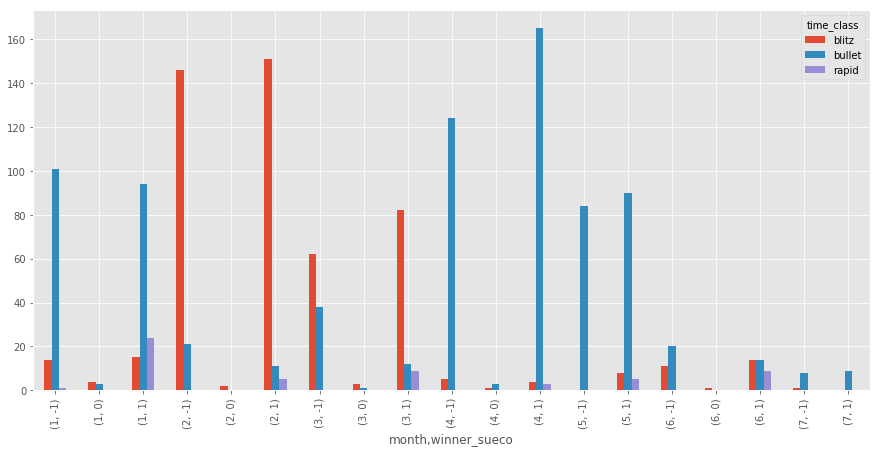

In [5]:

fig, ax = plt.subplots(figsize=(15,7))

dfSource.groupby(['month','winner_sueco','time_class',]).count()['id'].unstack().plot(ax=ax,kind='bar')
ax.grid(color='w')

# Report

In [7]:
dfPlot = dfSource

In [8]:
reportPath = '../../reports/'
reportFileName = f'{_notebookFolder}__result-{_version}.png'
reportFullPath = reportPath + reportFileName